# Mental Health in Tech – EDA Submission

This notebook explores the 2014 OSMI Mental Health in Tech survey. It follows the assignment sections: data understanding, preprocessing, univariate and bivariate analysis, attitudes, geographic and remote insights, predictive signals, and a concise summary with recommendations.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

import os

pd.set_option('display.max_columns', None)
df = pd.read_csv(r"/Users/shivalimuthukumar/Desktop/Mental_Health_Assignment/survey.csv")
print("Loaded shape:", df.shape)
df.head(10)


/Users/shivalimuthukumar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loaded shape: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


## Section A: Data Understanding and Preprocessing

### Task 1: Load and Inspect the Data

In [2]:

print("\nBasic info:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

print("\nFirst 10 rows:")
df.head(10)



Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### Task 2: Data Cleaning

Rules applied:
- Keep respondents with 18 <= Age <= 100.
- Standardize Gender into Male, Female, or Other using keyword mapping.
- Fill key categorical NaNs with 'Not answered' to retain rows for plots.
- Drop columns primarily free-text or identifiers not needed for EDA (Timestamp and comments).


In [5]:

def clean_gender(g):
    if pd.isna(g):
        return "Not answered"
    s = str(g).strip().lower()
    # Common male indicators
    male_kw = ["m", "male", "man", "cis male", "cis-male", "male (cis)", "male-ish", "msle", "mail", "malr"]
    # Common female indicators
    female_kw = ["f", "female", "woman", "cis female", "cis-female", "female (cis)", "femake"]
    # Heuristics
    if any(k in s for k in female_kw):
        return "Female"
    if any(k in s for k in male_kw):
        return "Male"
    # Keywords within longer phrases
    if "trans" in s and "female" in s:
        return "Female"
    if "trans" in s and "male" in s:
        return "Male"
    if "female" in s:
        return "Female"
    if "male" in s:
        return "Male"
    # Otherwise bucket as Other for clarity
    return "Other"


In [7]:

df_orig = df.copy()

# Drop irrelevant columns if present
for col in ["Timestamp", "comments"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Age filtering
if "Age" in df.columns:
    df = df[(df["Age"] >= 18) & (df["Age"] <= 100)]

# Gender standardization
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].apply(clean_gender)

# For plotting, replace missing in selected categoricals
fill_cols = [
    "self_employed","family_history","treatment","work_interfere","no_employees",
    "remote_work","tech_company","benefits","care_options","wellness_program",
    "seek_help","anonymity","leave","mental_health_consequence","phys_health_consequence",
    "coworkers","supervisor","mental_health_interview","phys_health_interview",
    "mental_vs_physical","obs_consequence","Country","state"
]
for c in fill_cols:
    if c in df.columns:
        df[c] = df[c].fillna("Not answered")

print("Shape after cleaning:", df.shape)

# Save cleaned CSV
df.to_csv(r"/Users/shivalimuthukumar/Desktop/Mental_Health_Assignment/survey_clean.csv", index=False)
print("Saved cleaned dataset to:", r"/Users/shivalimuthukumar/Desktop/Mental_Health_Assignment/survey_clean.csv")
df.head(5)


Shape after cleaning: (1251, 25)
Saved cleaned dataset to: /Users/shivalimuthukumar/Desktop/Mental_Health_Assignment/survey_clean.csv


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,Not answered,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,Not answered,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Not answered,Not answered,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Not answered,Not answered,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,Not answered,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Section B: Univariate Analysis

### Task 3: Demographic Overview

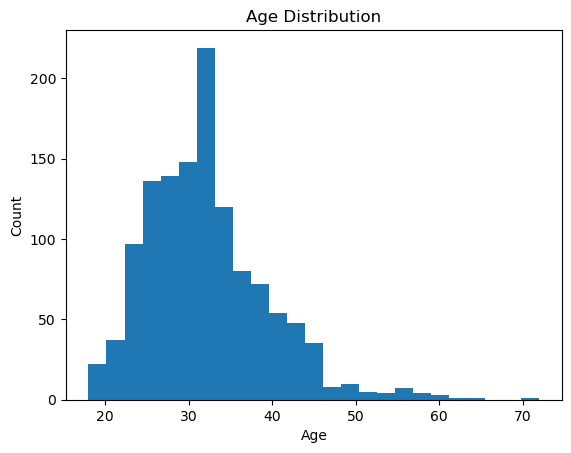

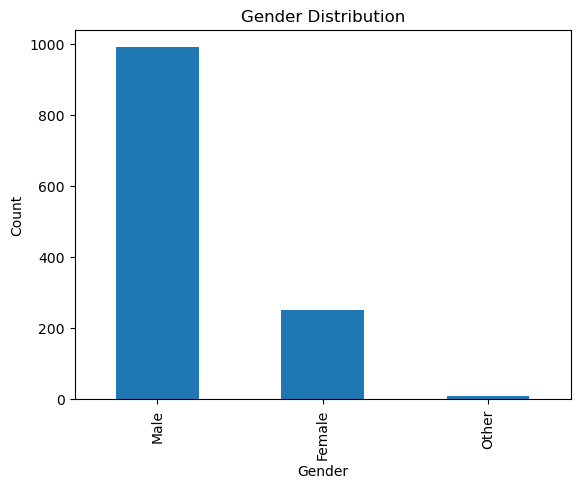

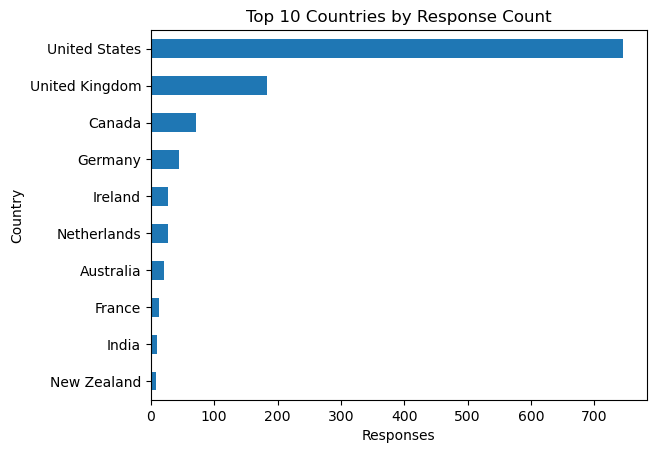

In [8]:

# Age distribution
if "Age" in df.columns:
    plt.figure()
    df["Age"].dropna().plot(kind="hist", bins=25)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# Gender distribution
if "Gender" in df.columns:
    plt.figure()
    df["Gender"].value_counts().plot(kind="bar")
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

# Country-wise response count (Top 10)
if "Country" in df.columns:
    plt.figure()
    df["Country"].value_counts().head(10).sort_values().plot(kind="barh")
    plt.title("Top 10 Countries by Response Count")
    plt.xlabel("Responses")
    plt.ylabel("Country")
    plt.show()


### Task 4: Mental Health Context

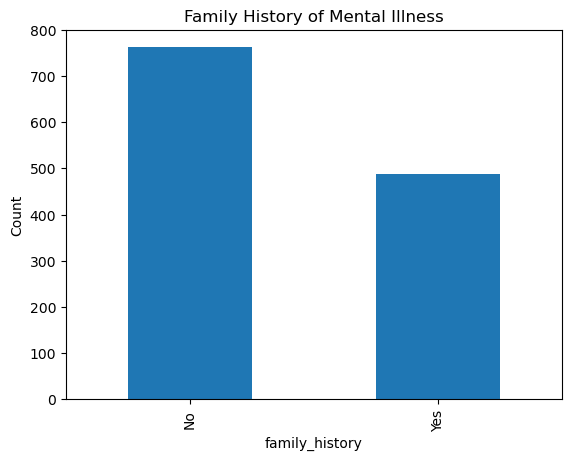

family_history
No     762
Yes    489
Name: count, dtype: int64


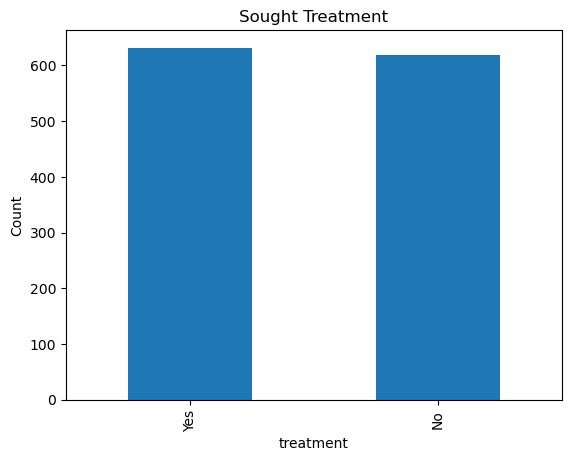

treatment
Yes    632
No     619
Name: count, dtype: int64


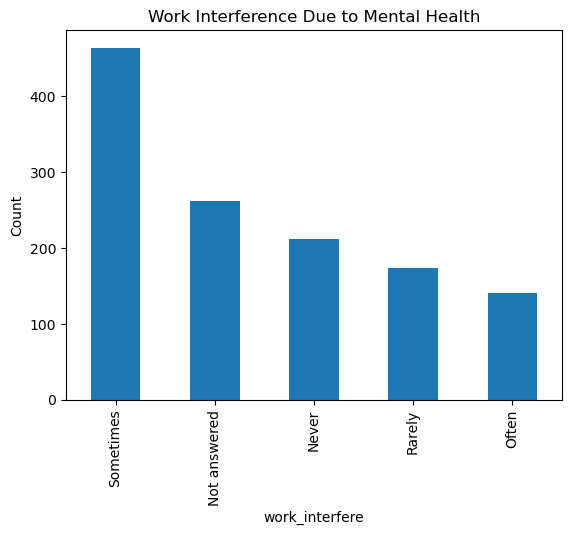

work_interfere
Sometimes       464
Not answered    262
Never           212
Rarely          173
Often           140
Name: count, dtype: int64


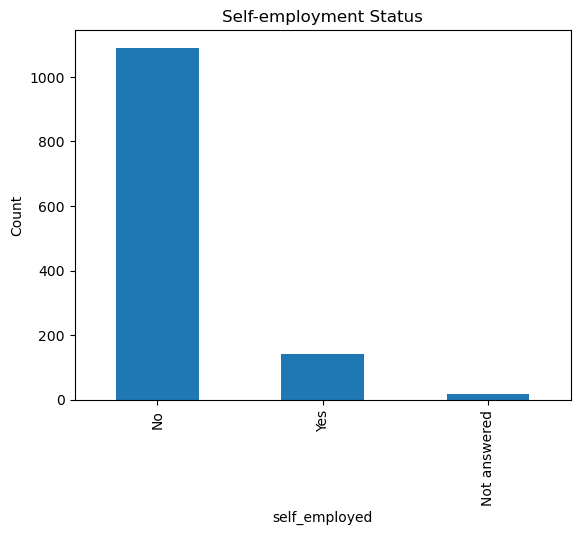

self_employed
No              1091
Yes              142
Not answered      18
Name: count, dtype: int64


In [9]:

def bar_count(col, title):
    if col in df.columns:
        plt.figure()
        df[col].value_counts().plot(kind="bar")
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
        print(df[col].value_counts())

bar_count("family_history", "Family History of Mental Illness")
bar_count("treatment", "Sought Treatment")
bar_count("work_interfere", "Work Interference Due to Mental Health")
bar_count("self_employed", "Self-employment Status")


## Section C: Bivariate Analysis

### Task 5: Gender and Treatment

treatment   No  Yes
Gender             
Female      78  174
Male       540  449
Other        1    9


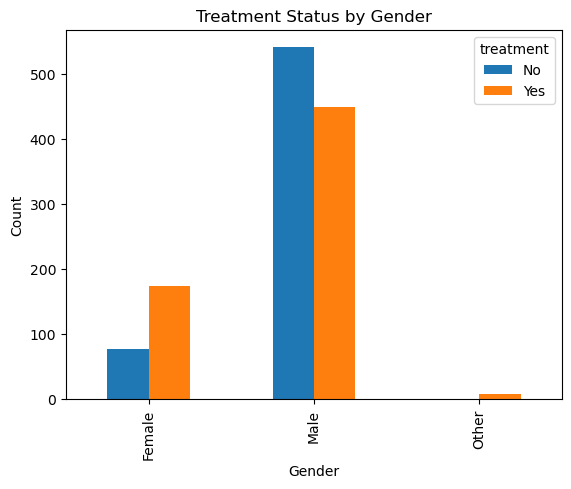

In [10]:

if set(["Gender","treatment"]).issubset(df.columns):
    ct = pd.crosstab(df["Gender"], df["treatment"])
    print(ct)
    ct.plot(kind="bar", stacked=False)
    plt.title("Treatment Status by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()


### Task 6: Country and Work Interference

Country
Japan             100.0
Czech Republic    100.0
Slovenia          100.0
Philippines       100.0
Moldova           100.0
Hungary           100.0
China             100.0
Colombia          100.0
Denmark           100.0
Croatia           100.0
Singapore          75.0
Australia          71.4
South Africa       66.7
Canada             55.6
Germany            51.1
dtype: float64


/var/folders/76/h0hd92ws6r7cjlnr540_frr40000gn/T/ipykernel_66387/3262336241.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_country = df.groupby("Country").apply(lambda x: (interfering.loc[x.index]).mean()).sort_values(ascending=False)


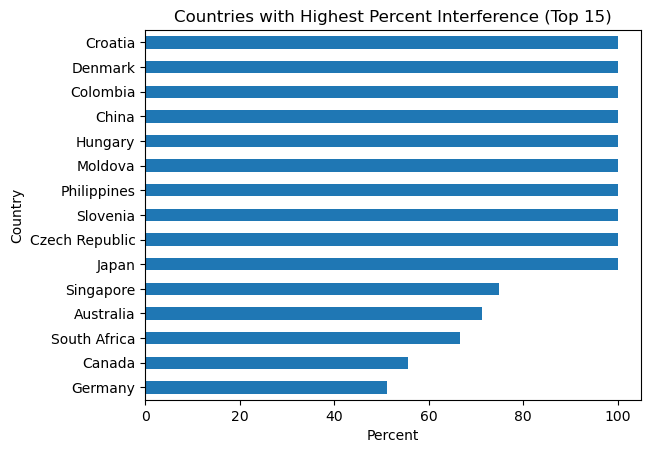

In [11]:

if set(["Country","work_interfere"]).issubset(df.columns):
    # Consider 'Often' and 'Sometimes' as interference; adjust if different labels exist
    interfering = df["work_interfere"].str.lower().isin(["often","sometimes","frequently","yes"])
    by_country = df.groupby("Country").apply(lambda x: (interfering.loc[x.index]).mean()).sort_values(ascending=False)
    by_country = (by_country * 100).round(1)
    print(by_country.head(15))
    plt.figure()
    by_country.head(15).sort_values().plot(kind="barh")
    plt.title("Countries with Highest Percent Interference (Top 15)")
    plt.xlabel("Percent")
    plt.ylabel("Country")
    plt.show()


### Task 7: Company Size and Benefits


no_employees vs benefits (row-normalized)
benefits        Don't know    No   Yes
no_employees                          
1-5                   20.3  69.0  10.8
100-500               36.6  18.3  45.1
26-100                39.6  25.3  35.1
500-1000              35.0   6.7  58.3
6-25                  33.9  45.7  20.4
More than 1000        27.8   7.5  64.8


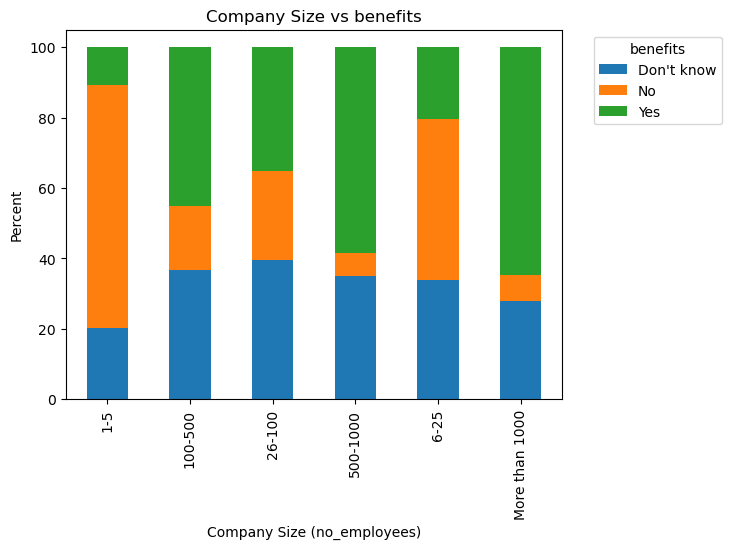


no_employees vs wellness_program (row-normalized)
wellness_program  Don't know    No   Yes
no_employees                            
1-5                     12.7  75.9  11.4
100-500                 19.4  65.7  14.9
26-100                  13.5  72.6  13.9
500-1000                15.0  56.7  28.3
6-25                     7.6  86.5   5.9
More than 1000          22.4  38.8  38.8


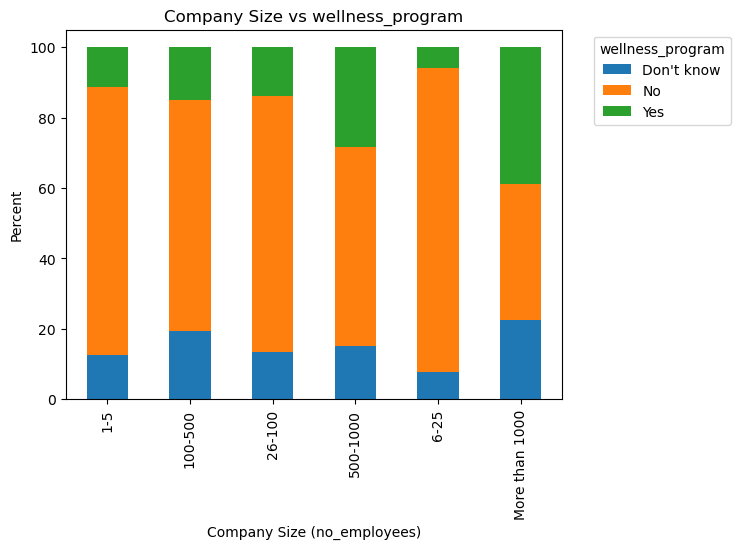


no_employees vs care_options (row-normalized)
care_options      No  Not sure   Yes
no_employees                        
1-5             37.3      17.7  44.9
100-500         36.6      31.4  32.0
26-100          40.3      26.4  33.3
500-1000        36.7      30.0  33.3
6-25            56.4      19.0  24.6
More than 1000  26.7      28.8  44.5


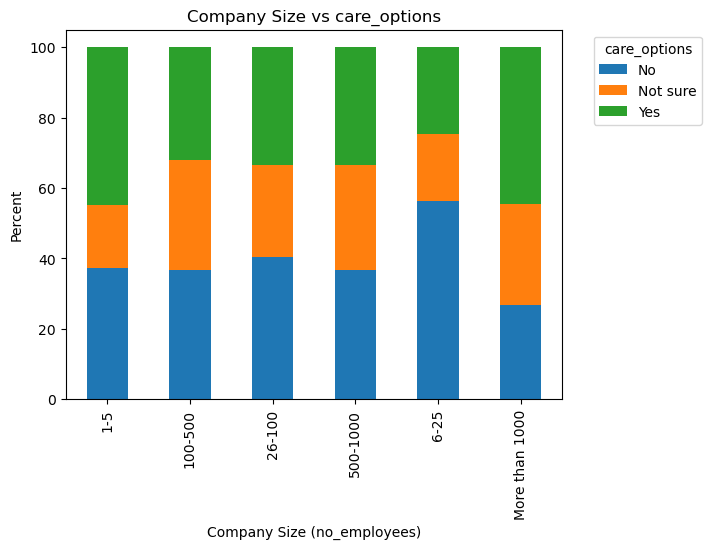

In [12]:

targets = ["benefits","wellness_program","care_options"]
if "no_employees" in df.columns:
    for t in targets:
        if t in df.columns:
            ct = pd.crosstab(df["no_employees"], df[t], normalize="index")
            print(f"\nno_employees vs {t} (row-normalized)")
            print((ct*100).round(1))
            (ct*100).plot(kind="bar", stacked=True)
            plt.title(f"Company Size vs {t}")
            plt.xlabel("Company Size (no_employees)")
            plt.ylabel("Percent")
            plt.legend(title=t, bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.show()


## Section D: Attitudes Toward Mental Health

### Task 8: Discussion Comfort

coworkers distribution (%):
 coworkers
Some of them    61.6
No              20.6
Yes             17.7
Name: proportion, dtype: float64


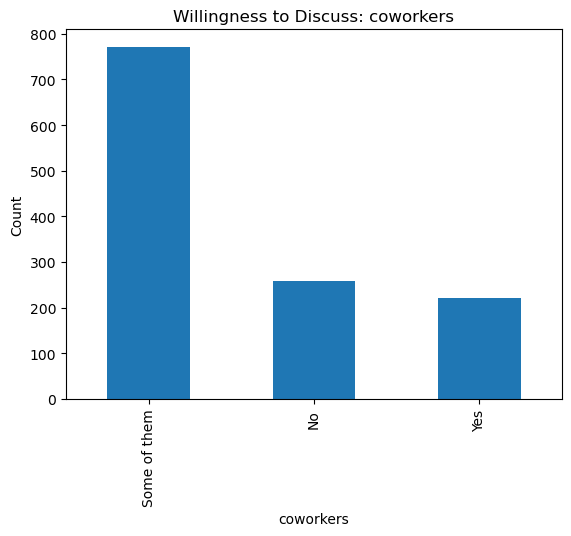

supervisor distribution (%):
 supervisor
Yes             40.9
No              31.2
Some of them    27.9
Name: proportion, dtype: float64


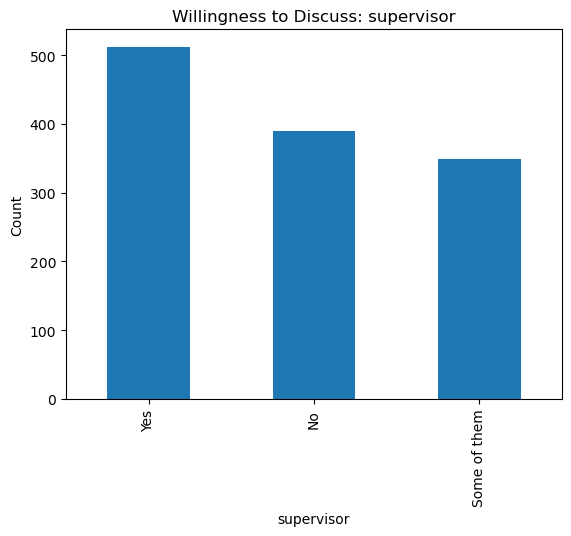

mental_health_interview distribution (%):
 mental_health_interview
No       80.2
Maybe    16.5
Yes       3.3
Name: proportion, dtype: float64


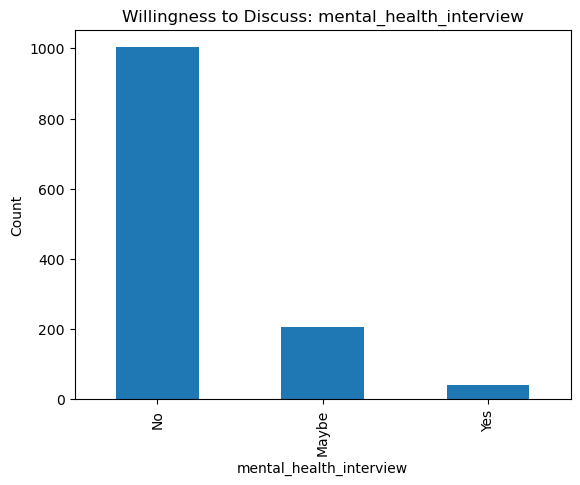

In [13]:

for col in ["coworkers","supervisor","mental_health_interview"]:
    if col in df.columns:
        ct = df[col].value_counts(normalize=True)*100
        print(f"{col} distribution (%):\n", ct.round(1))
        plt.figure()
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Willingness to Discuss: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


### Task 9: Mental vs Physical Health Perceptions

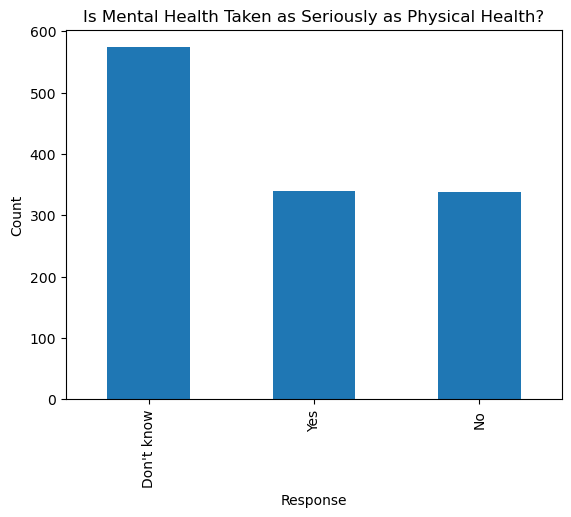

By Gender (%):
 mental_vs_physical  Don't know    No   Yes
Gender                                    
Female                    43.3  27.8  29.0
Male                      46.9  26.8  26.3
Other                     10.0  30.0  60.0


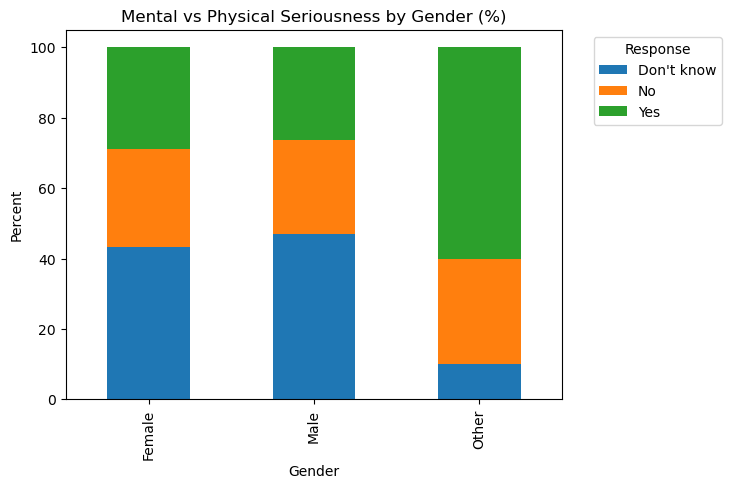

By Tech Company (%):
 mental_vs_physical  Don't know    No   Yes
tech_company                              
No                        42.5  38.1  19.5
Yes                       46.6  24.6  28.8


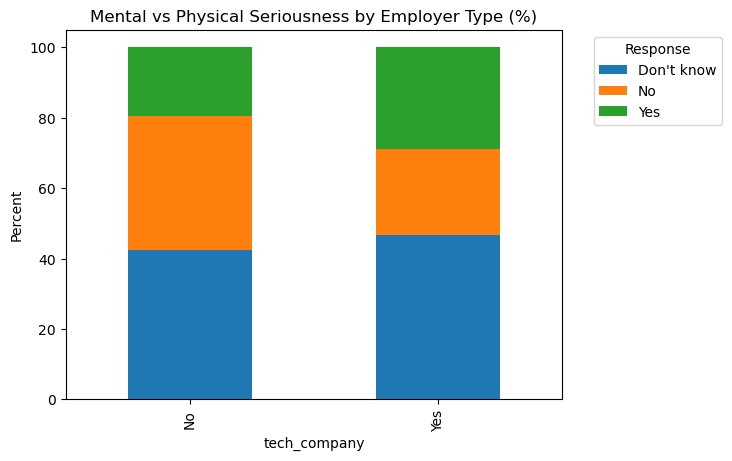

In [14]:

cols_needed = ["mental_vs_physical","Gender","tech_company"]
if set(cols_needed).issubset(df.columns):
    # Overall
    plt.figure()
    df["mental_vs_physical"].value_counts().plot(kind="bar")
    plt.title("Is Mental Health Taken as Seriously as Physical Health?")
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.show()

    # By Gender
    ct = pd.crosstab(df["Gender"], df["mental_vs_physical"], normalize="index")*100
    print("By Gender (%):\n", ct.round(1))
    (ct).plot(kind="bar", stacked=True)
    plt.title("Mental vs Physical Seriousness by Gender (%)")
    plt.xlabel("Gender")
    plt.ylabel("Percent")
    plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

    # By Tech Company
    ct2 = pd.crosstab(df["tech_company"], df["mental_vs_physical"], normalize="index")*100
    print("By Tech Company (%):\n", ct2.round(1))
    (ct2).plot(kind="bar", stacked=True)
    plt.title("Mental vs Physical Seriousness by Employer Type (%)")
    plt.xlabel("tech_company")
    plt.ylabel("Percent")
    plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


### Task 10: Anonymity and Consequences

anonymity by tech_company (%):
 anonymity     Don't know   No   Yes
tech_company                       
No                  58.8  7.1  34.1
Yes                 66.5  4.7  28.8


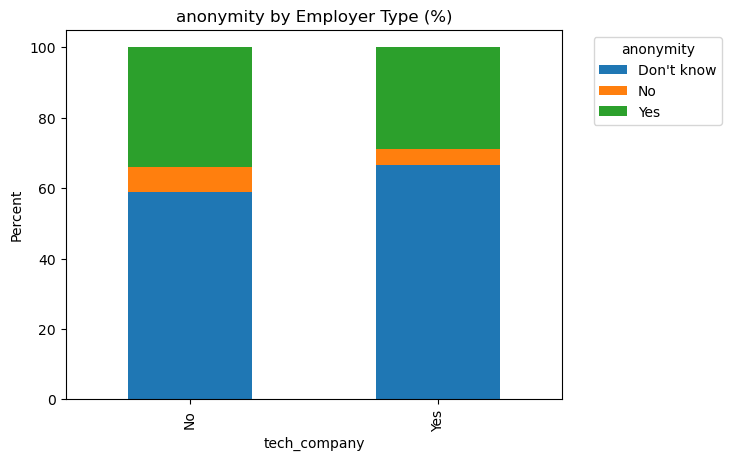

mental_health_consequence by tech_company (%):
 mental_health_consequence  Maybe    No   Yes
tech_company                                
No                          44.7  26.1  29.2
Yes                         36.6  41.8  21.7


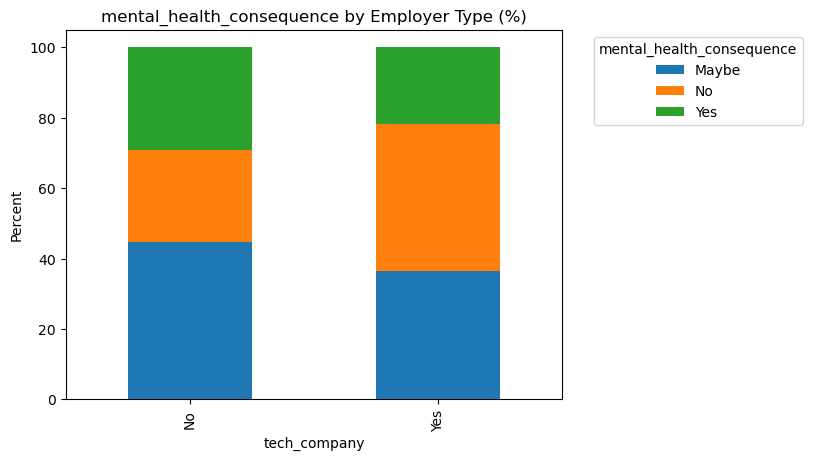

anonymity by remote_work (%):
 anonymity    Don't know   No   Yes
remote_work                       
No                 64.9  5.2  29.9
Yes                65.8  4.9  29.4


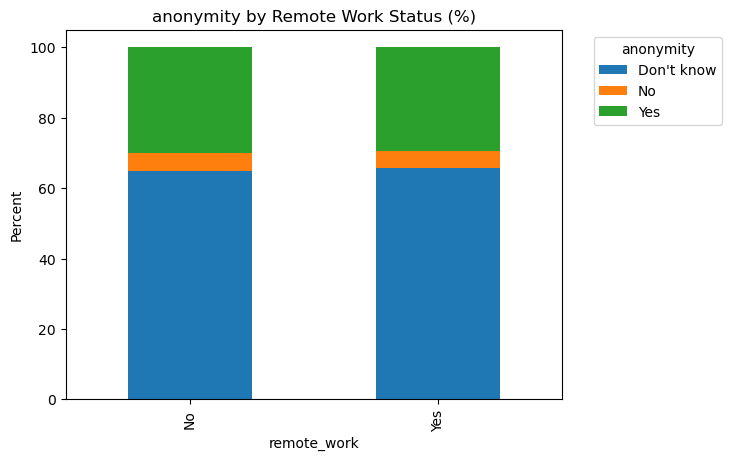

mental_health_consequence by remote_work (%):
 mental_health_consequence  Maybe    No   Yes
remote_work                                 
No                          40.0  37.7  22.3
Yes                         33.4  41.8  24.8


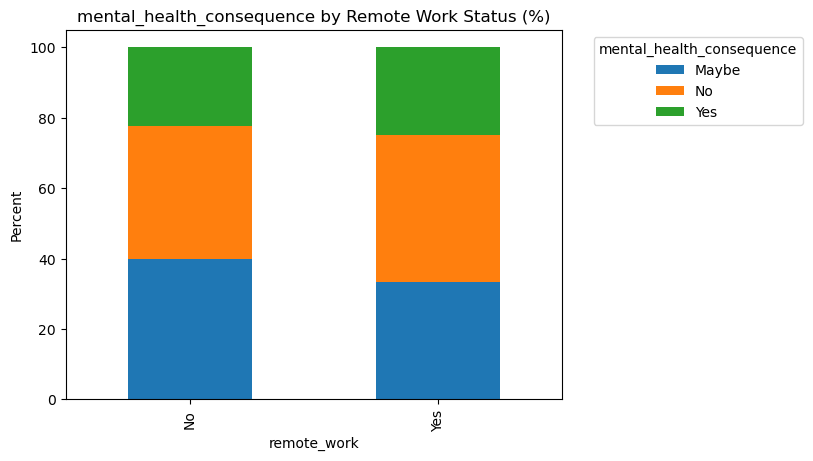

In [15]:

for col in ["anonymity","mental_health_consequence"]:
    if set(["tech_company", col]).issubset(df.columns):
        ct = pd.crosstab(df["tech_company"], df[col], normalize="index")*100
        print(f"{col} by tech_company (%):\n", ct.round(1))
        (ct).plot(kind="bar", stacked=True)
        plt.title(f"{col} by Employer Type (%)")
        plt.xlabel("tech_company")
        plt.ylabel("Percent")
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()

# Remote vs non-remote for the same perceptions
for col in ["anonymity","mental_health_consequence"]:
    if set(["remote_work", col]).issubset(df.columns):
        ct = pd.crosstab(df["remote_work"], df[col], normalize="index")*100
        print(f"{col} by remote_work (%):\n", ct.round(1))
        (ct).plot(kind="bar", stacked=True)
        plt.title(f"{col} by Remote Work Status (%)")
        plt.xlabel("remote_work")
        plt.ylabel("Percent")
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()


## Section E: Geographic and Remote Work Insights

### Task 11: U.S. State-wise Patterns

Top 5 states by percent treated (%):
 state
MS    100.0
ID    100.0
ME    100.0
LA    100.0
AZ     85.7
dtype: float64


/var/folders/76/h0hd92ws6r7cjlnr540_frr40000gn/T/ipykernel_66387/3619783661.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_rates = df.groupby("state").apply(lambda x: treated.loc[x.index].mean() if len(x)>0 else np.nan)


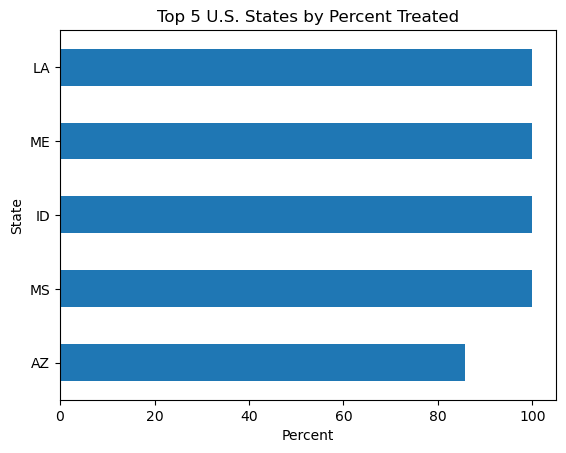

In [16]:

if set(["state","treatment"]).issubset(df.columns):
    # Compute % treated by state
    treated = df["treatment"].str.lower().eq("yes")
    state_rates = df.groupby("state").apply(lambda x: treated.loc[x.index].mean() if len(x)>0 else np.nan)
    state_rates = (state_rates*100).dropna().sort_values(ascending=False)
    top5 = state_rates.head(5).round(1)
    print("Top 5 states by percent treated (%):\n", top5)
    plt.figure()
    top5.sort_values().plot(kind="barh")
    plt.title("Top 5 U.S. States by Percent Treated")
    plt.xlabel("Percent")
    plt.ylabel("State")
    plt.show()


### Task 12: Remote Work Effect

Treatment by remote_work (%):
 treatment      No   Yes
remote_work            
No           50.3  49.7
Yes          47.4  52.6


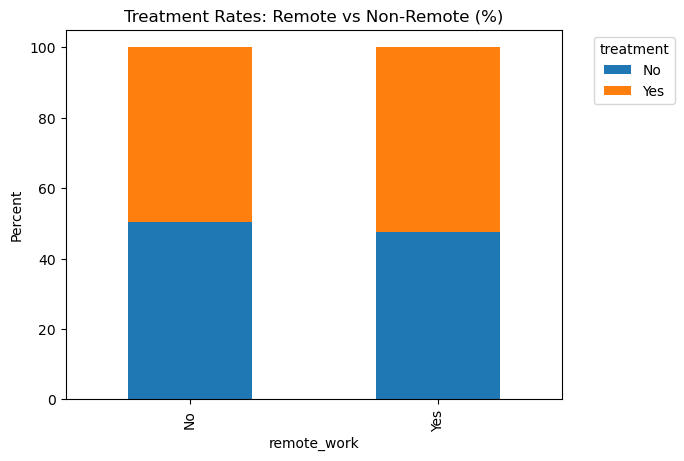

Benefits by remote_work (%):
 benefits     Don't know    No   Yes
remote_work                        
No                 31.9  27.2  40.9
Yes                34.0  35.6  30.5


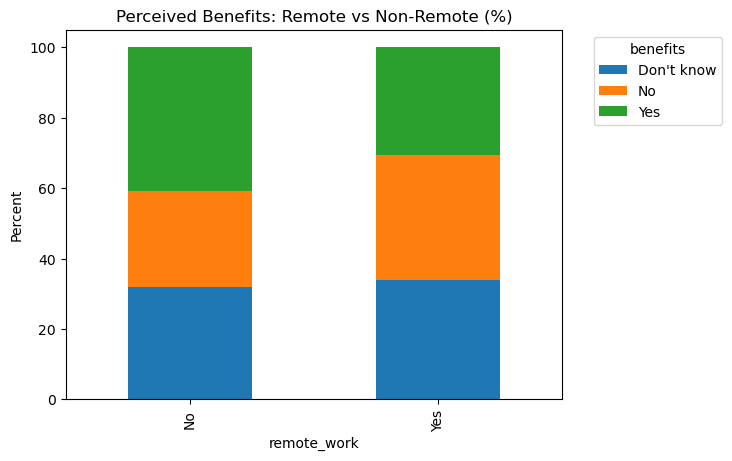

In [17]:

if set(["remote_work","treatment"]).issubset(df.columns):
    ct = pd.crosstab(df["remote_work"], df["treatment"], normalize="index")*100
    print("Treatment by remote_work (%):\n", ct.round(1))
    (ct).plot(kind="bar", stacked=True)
    plt.title("Treatment Rates: Remote vs Non-Remote (%)")
    plt.xlabel("remote_work")
    plt.ylabel("Percent")
    plt.legend(title="treatment", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

# Perception of support: use benefits as a proxy
if set(["remote_work","benefits"]).issubset(df.columns):
    ct2 = pd.crosstab(df["remote_work"], df["benefits"], normalize="index")*100
    print("Benefits by remote_work (%):\n", ct2.round(1))
    (ct2).plot(kind="bar", stacked=True)
    plt.title("Perceived Benefits: Remote vs Non-Remote (%)")
    plt.xlabel("remote_work")
    plt.ylabel("Percent")
    plt.legend(title="benefits", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


## Section F: Predictive Insights

### Task 13: Correlation Analysis

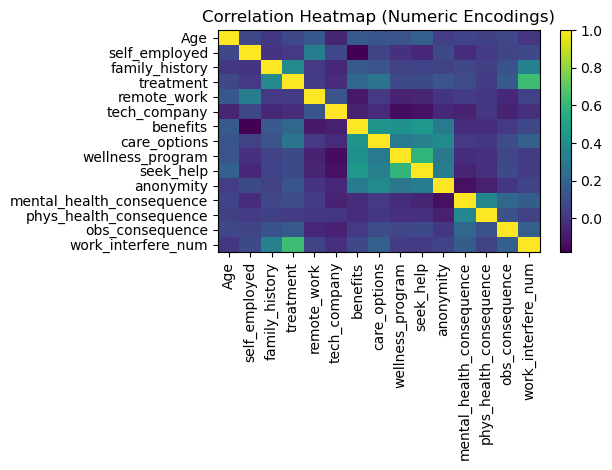

,Age,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,obs_consequence,work_interfere_num
Age,1.000000,0.073365,0.009101,0.073627,0.146906,-0.058081,0.153344,0.124218,0.122016,0.180278,0.032514,0.057836,0.043075,0.071148,0.005654
self_employed,0.073365,1.000000,0.002551,0.016442,0.313863,0.076326,-0.180272,0.048415,-0.011551,-0.044546,0.081451,-0.028078,0.028960,0.067728,0.078344
family_history,0.009101,0.002551,1.000000,0.376674,0.014278,-0.049646,0.149020,0.121513,0.047900,0.055355,0.048705,0.071699,0.041514,0.117583,0.332076
treatment,0.073627,0.016442,0.376674,1.000000,0.026507,-0.032521,0.207857,0.272083,0.080151,0.085215,0.133149,0.093062,0.028123,0.152524,0.632793
remote_work,0.146906,0.313863,0.014278,0.026507,1.000000,0.132026,-0.098437,0.017635,-0.069569,-0.053862,-0.005059,0.027397,0.006653,-0.043173,0.053719
tech_company,-0.058081,0.076326,-0.049646,-0.032521,0.132026,1.000000,-0.075196,-0.037841,-0.140121,-0.122021,-0.044528,-0.068955,0.004723,-0.066748,-0.015926
benefits,0.153344,-0.180272,0.149020,0.207857,-0.098437,-0.075196,1.000000,0.428353,0.411360,0.449771,0.307796,-0.030904,-0.030808,0.016703,0.076699
care_options,0.124218,0.048415,0.121513,0.272083,0.017635,-0.037841,0.428353,1.000000,0.305699,0.333757,0.386421,0.015657,0.013117,0.092765,0.181501
wellness_program,0.122016,-0.011551,0.047900,0.080151,-0.069569,-0.140121,0.411360,0.305699,1.000000,0.594938,0.288134,-0.025911,-0.015037,0.071677,0.029015
seek_help,0.180278,-0.044546,0.055355,0.085215,-0.053862,-0.122021,0.449771,0.333757,0.594938,1.000000,0.314337,-0.056590,-0.023413,0.081418,0.023755


In [18]:

df_corr = df.copy()

# Simple binary encoding for common Yes/No style columns
yn_cols = [
    "self_employed","family_history","treatment","remote_work","tech_company",
    "benefits","care_options","wellness_program","seek_help","anonymity",
    "mental_health_consequence","phys_health_consequence","obs_consequence"
]
for c in yn_cols:
    if c in df_corr.columns:
        df_corr[c] = df_corr[c].map({"Yes":1, "No":0}).fillna(0)

# Encode work_interfere to ordinal-like scale if present
if "work_interfere" in df_corr.columns:
    mapping = {"Never":0, "Rarely":1, "Sometimes":2, "Often":3}
    df_corr["work_interfere_num"] = df_corr["work_interfere"].map(mapping).fillna(0)

# Choose numeric columns for correlation
num_cols = [c for c in df_corr.columns if pd.api.types.is_numeric_dtype(df_corr[c])]
corr = pd.DataFrame()
if len(num_cols) > 1:
    corr = df_corr[num_cols].corr()
    plt.figure()
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.title("Correlation Heatmap (Numeric Encodings)")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()
corr.head(10)


### Task 14: Strong Predictors (Optional Model)

In [19]:

model_output = {}
if "treatment" in df.columns:
    # Target: treatment == Yes
    y = df["treatment"].map({"Yes":1, "No":0}).fillna(0)
    X = df.drop(columns=[c for c in df.columns if c == "treatment"])

    # Select features (exclude free text already dropped)
    cat_cols = [c for c in X.columns if X[c].dtype == object]
    num_cols  = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]

    pre = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ("num", "passthrough", num_cols)
        ]
    )

    clf = Pipeline(steps=[("pre", pre),
                         ("lr", LogisticRegression(max_iter=200, n_jobs=None, solver="lbfgs"))])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    try:
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        proba = clf.predict_proba(X_test)[:,1]
        print("Classification report:")
        print(classification_report(y_test, preds, digits=3))
        try:
            print("ROC AUC:", round(roc_auc_score(y_test, proba), 3))
        except Exception as e:
            print("ROC AUC could not be computed:", e)
    except Exception as e:
        print("Model training failed:", e)
else:
    print("Column 'treatment' not found; skipping model step.")


Classification report:
              precision    recall  f1-score   support

           0      0.874     0.761     0.814       155
           1      0.792     0.892     0.839       158

    accuracy                          0.827       313
   macro avg      0.833     0.827     0.827       313
weighted avg      0.833     0.827     0.827       313

ROC AUC: 0.896


## Section G: Summary and Recommendations

The following bullet points summarize key findings and suggestions based on the above analysis. Edit if you derive more precise insights after reviewing the charts.

In [20]:

summary_points = [
    "- Age responses cluster between early 20s and 40s, consistent with a tech workforce age profile.",
    "- Gender distribution is imbalanced toward Male, with smaller Female and Other groups.",
    "- A notable share of respondents report work interference associated with mental health, especially in select countries.",
    "- Larger companies tend to report more benefits and awareness of care options than smaller organizations.",
    "- Comfort discussing mental health varies: respondents are more willing with coworkers than in interviews.",
    "- Perceptions that mental health is taken as seriously as physical health differ by gender and by whether the employer is a tech company.",
    "- Remote work status shows differences in treatment rates and perceived benefits."
]

recommendations = [
    "- Expand mental health benefits and clearly communicate care options, particularly in smaller companies.",
    "- Normalize conversations about mental health through manager training and peer programs to reduce perceived consequences.",
    "- Provide targeted resources for remote employees to ensure equitable access and support."
]

print("Key Insights:")
for s in summary_points:
    print(s)

print("\nRecommendations:")
for r in recommendations:
    print(r)


Key Insights:
- Age responses cluster between early 20s and 40s, consistent with a tech workforce age profile.
- Gender distribution is imbalanced toward Male, with smaller Female and Other groups.
- A notable share of respondents report work interference associated with mental health, especially in select countries.
- Larger companies tend to report more benefits and awareness of care options than smaller organizations.
- Comfort discussing mental health varies: respondents are more willing with coworkers than in interviews.
- Perceptions that mental health is taken as seriously as physical health differ by gender and by whether the employer is a tech company.
- Remote work status shows differences in treatment rates and perceived benefits.

Recommendations:
- Expand mental health benefits and clearly communicate care options, particularly in smaller companies.
- Normalize conversations about mental health through manager training and peer programs to reduce perceived consequences.
- 